<a href="https://colab.research.google.com/github/NehaFathimas/DashBoards/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Algorithm**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('purchase.csv')

In [ ]:
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased
0,1,22,Male,35,Bachelor,Single,No
1,2,25,Female,40,Master,Single,Yes
2,3,47,Male,85,PhD,Married,Yes
3,4,52,Female,110,Bachelor,Married,No
4,5,46,Male,78,Master,Married,Yes
5,6,56,Female,95,Bachelor,Single,No
6,7,35,Female,60,PhD,Married,Yes
7,8,33,Male,58,Bachelor,Single,No
8,9,29,Female,45,Master,Single,Yes
9,10,41,Male,80,PhD,Married,Yes


**Encode Categorical Variables**

In [ ]:
le=LabelEncoder()
df['Age_n']=le.fit_transform(df['Age'])
df['Gender_n']=le.fit_transform(df['Gender'])
df['Income_n']=le.fit_transform(df['Income'])
df['Education_n']=le.fit_transform(df['Education'])
df['Marital Status_n']=le.fit_transform(df['Marital Status'])
df['Purchased_n']=le.fit_transform(df['Purchased'])

In [ ]:
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,1,22,Male,35,Bachelor,Single,No,0,1,0,0,1,0
1,2,25,Female,40,Master,Single,Yes,1,0,1,1,1,1
2,3,47,Male,85,PhD,Married,Yes,7,1,7,2,0,1
3,4,52,Female,110,Bachelor,Married,No,8,0,9,0,0,0
4,5,46,Male,78,Master,Married,Yes,6,1,5,1,0,1
5,6,56,Female,95,Bachelor,Single,No,9,0,8,0,1,0
6,7,35,Female,60,PhD,Married,Yes,4,0,4,2,0,1
7,8,33,Male,58,Bachelor,Single,No,3,1,3,0,1,0
8,9,29,Female,45,Master,Single,Yes,2,0,2,1,1,1
9,10,41,Male,80,PhD,Married,Yes,5,1,6,2,0,1


In [ ]:
independent_var=df.drop(['ID'],axis=1)
dependent_var=df['Purchased_n']

In [ ]:
df=df.drop(['Age','Gender','Income','Education','Marital Status','Purchased'],axis=1)

In [ ]:
df

,ID,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,1,0,1,0,0,1,0
1,2,1,0,1,1,1,1
2,3,7,1,7,2,0,1
3,4,8,0,9,0,0,0
4,5,6,1,5,1,0,1
5,6,9,0,8,0,1,0
6,7,4,0,4,2,0,1
7,8,3,1,3,0,1,0
8,9,2,0,2,1,1,1
9,10,5,1,6,2,0,1


Split Features and Target:

In [ ]:
independent_var=df.drop(['Purchased_n','ID'],axis='columns')
dependent_var=df['Purchased_n']

In [ ]:
independent_var

,Age_n,Gender_n,Income_n,Education_n,Marital Status_n
0,0,1,0,0,1
1,1,0,1,1,1
2,7,1,7,2,0
3,8,0,9,0,0
4,6,1,5,1,0
5,9,0,8,0,1
6,4,0,4,2,0
7,3,1,3,0,1
8,2,0,2,1,1
9,5,1,6,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 33.33%


In [ ]:
new_data=[[22,30,40,45,50]]

In [ ]:
prediction = model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("prediction (0 = No, 1 = Yes):",prediction[0])

prediction (0 = No, 1 = Yes): 1


**Display Tree Rules(Text-Based)**

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

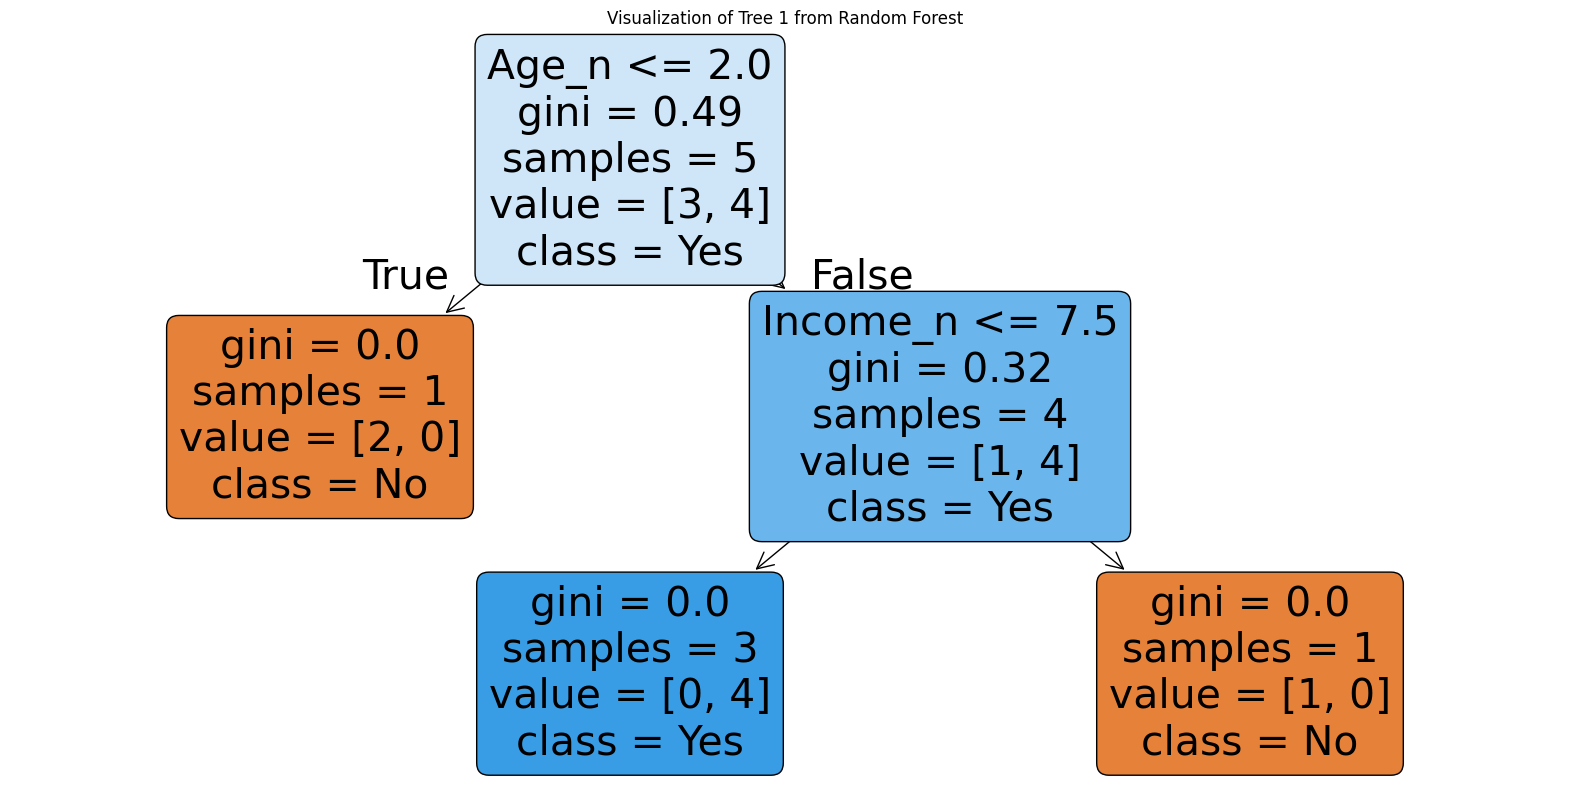

In [ ]:
# Access the first decision tree from your trained Random Forest model
first_tree = model.estimators_[0]

# Visualize the first tree
plt.figure(figsize=(20, 10))
plot_tree(
    first_tree,
    feature_names=independent_var.columns,  # Use your encoded feature column names
    class_names=['No', 'Yes'],             # Assuming 0 = No, 1 = Yes for 'Purchased'
    filled=True,
    rounded=True,
    max_depth=3                            # Optional: limit tree depth for clarity
)
plt.title("Visualization of Tree 1 from Random Forest")
plt.show()